<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

k-Nearest Neighbor Classifier with MaxAbsScaler & Quantile Transformer

This Code template is for the Classification task using a simple KNeighborsClassifier based on the K-Nearest Neighbors algorithm along with the data rescaling technique MaxAbsScaler and feature transformation technique QuantileTransformer in a pipeline. The k-NN algorithm can be used for Regression but frequently is used for Classification problems.

### Required Packages

In [ ]:
!pip install imblearn

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, QuantileTransformer
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#file_path
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features=[]

Target feature for prediction.

In [4]:
#y_value
target = ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.


In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

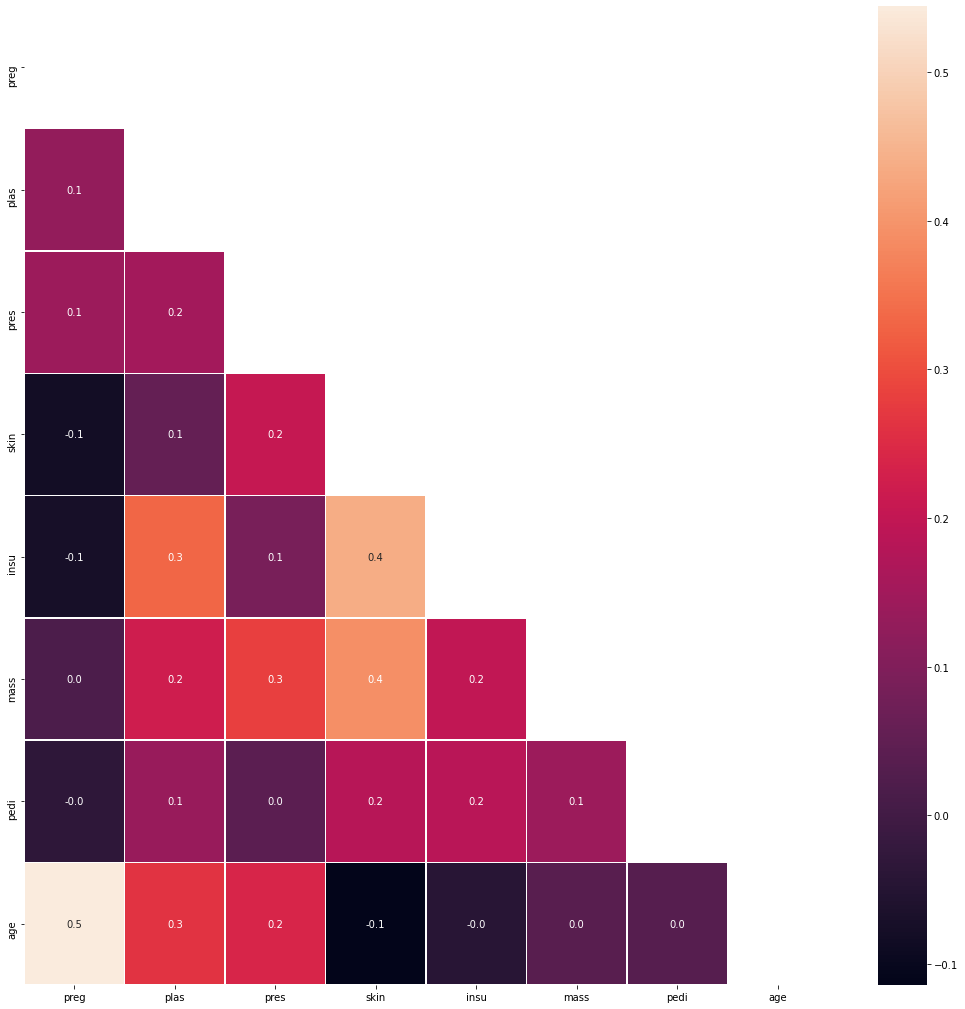

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

<AxesSubplot:xlabel='class', ylabel='count'>

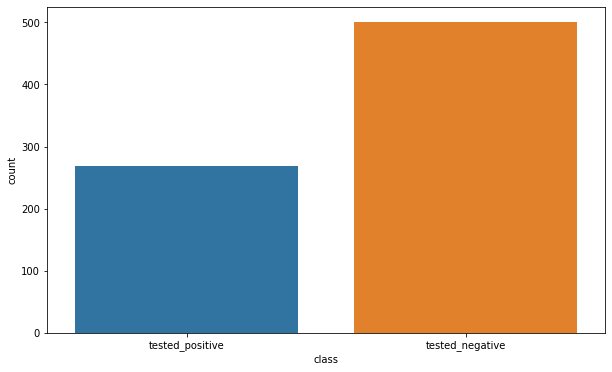

In [10]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [12]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Data Rescaling

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

[More on MaxAbsScaler module and parameters](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)

### Feature Transformation

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

[More on QuantileTransformer module and parameters](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

### Model

KNN is one of the easiest Machine Learning algorithms based on Supervised Machine Learning technique. The algorithm stores all the available data and classifies a new data point based on the similarity. It assumes the similarity between the new data and data and put the new case into the category that is most similar to the available categories.KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the available data.

#### Model Tuning Parameters
  
  > - **n_neighbors** -> Number of neighbors to use by default for kneighbors queries.

  > - **weights** -> weight function used in prediction. {**uniform,distance**}

  > - **algorithm**-> Algorithm used to compute the nearest neighbors. {**‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’**}

  > - **p** -> Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
    
  > - **leaf_size** -> Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

In [13]:
model= make_pipeline(MaxAbsScaler(), QuantileTransformer(), KNeighborsClassifier())
model.fit(x_train,y_train)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [14]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 77.92 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

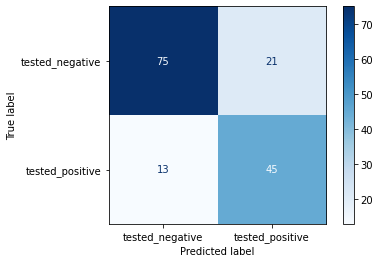

In [15]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* where:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [16]:
print(classification_report(y_test,model.predict(x_test)))

                 precision    recall  f1-score   support

tested_negative       0.85      0.78      0.82        96
tested_positive       0.68      0.78      0.73        58

       accuracy                           0.78       154
      macro avg       0.77      0.78      0.77       154
   weighted avg       0.79      0.78      0.78       154



#### Creator: Nikhil Shrotri , Github: [Profile](https://github.com/nikhilshrotri)